In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from spextractor import Spextractor
import pandas as pd
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.io import ascii
import glob

In [31]:
###### read spectrum 
spectra=glob.glob('spectra/SNIIb/*')
spectra.sort()
i=1

print(spectra[i])

# Name of the supernova
string = spectra[i]
SName=string.split('/')[-1].split('.')[0]

spectra/SNIIb/2013ep_2013-08-02_00-27-26_Ekar_AFOSC_Asiago.ascii


2013ep_2013-08-02_00-27-26_Ekar_AFOSC_Asiago
[[4.00967352e+03 3.14241547e-16]
 [4.01451028e+03 3.11365314e-16]
 [4.01934704e+03 2.95068506e-16]
 ...
 [7.99032664e+03 9.28904637e-17]
 [7.99516340e+03 9.55297390e-17]
 [8.00000016e+03 9.56269757e-17]]


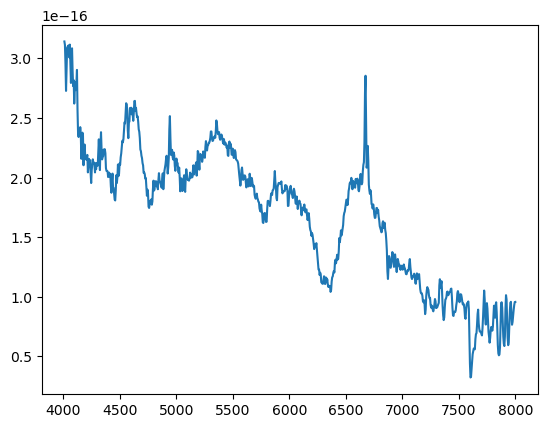

In [32]:

# spetra to a numpy array
tab = pd.read_csv(spectra[i], comment='#',header=1,delim_whitespace=True,names=('x','f'))
#,dtype={'x': np.float64, 'f': np.float64, 'e': np.float64})
#if type(tab['e'])== None:tab['e']=tab['f']*0.01 + 1.25*np.std(tab['f'])
tab2=tab.to_numpy()
tab2

# Name of the supernova
string = spectra[i]
SName=string.split('/')[-1].split('.')[0]
print(SName)

print(tab2)



plt.plot(tab['x'],tab['f'],label='Observed')
#plt.plot(tab['x']/(1.0+z),tab['f'],label='Rest Frame')
plt.show()

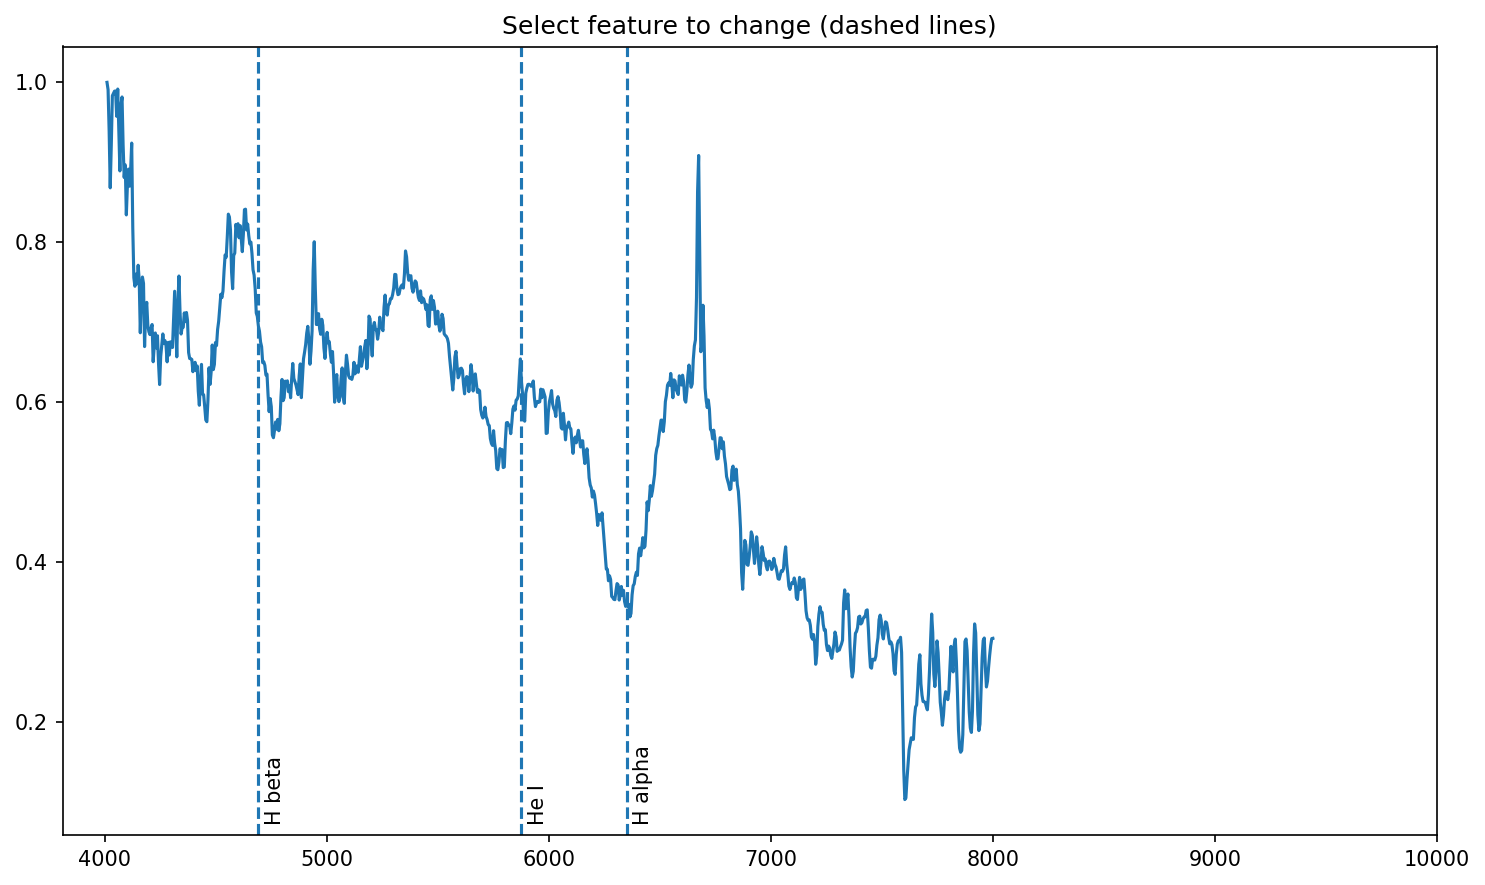

In [37]:
sn_type='II'
z=None
spex = Spextractor(tab2, sn_type,z=z, manual_range=True, plot=True)

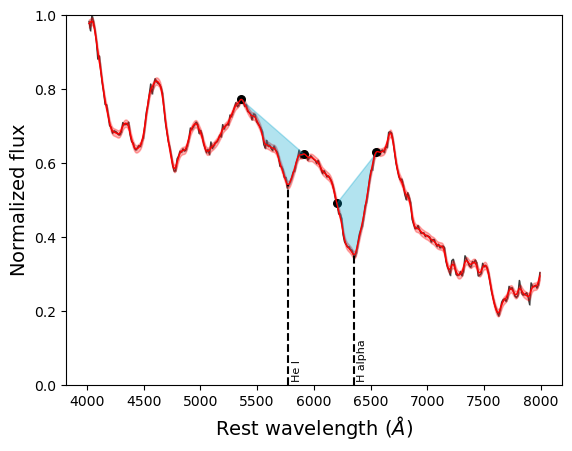

In [38]:
spex.create_model(downsampling=2.0,sigma_outliers=3.5,model_uncertainty=True,optimize_noise=False)
spex.process()

In [40]:
###### SN Type II ######
# He beta

hb = 'H beta'
vhb = spex.vel[hb]
vhb_err = spex.vel_err[hb]
print(f'vhb = {vhb:.3f} +- {vhb_err:.3f}')

phb = spex.pew[hb]
phb_err = spex.pew_err[hb]
print(f'phb = {phb:.3f} +- {phb_err:.3f}')

try: 
    dhb = spex.depth[hb][0]
except:
    dhb = np.nan
    
try: 
    dhb_err = spex.depth_err[hb][0]
except:
    dhb_err = np.nan
    
print(f'dhb = {dhb:.3f} +- {dhb_err:.3f}')


# He I

he = 'He I'
vhe = spex.vel[he]
vhe_err = spex.vel_err[he]
print(f'vhe = {vhe:.3f} +- {vhe_err:.3f}')

phe = spex.pew[he]
phe_err = spex.pew_err[he]
print(f'phe = {phe:.3f} +- {phe_err:.3f}')

try: 
    dhe = spex.depth[he][0]
except:
    dhe = np.nan
    
try: 
    dhe_err = spex.depth_err[he][0]
except:
    dhe_err = np.nan
    
print(f'dhe = {dhe:.3f} +- {dhe_err:.3f}')


# H Alpha

ha = 'H alpha'
vha = spex.vel[ha]
vha_err = spex.vel_err[ha]
print(f'vha = {vha:.3f} +- {vha_err:.3f}')

pha = spex.pew[ha]
pha_err = spex.pew_err[ha]
print(f'pha = {pha:.3f} +- {pha_err:.3f}')

try: 
    dha = spex.depth[ha][0]
except:
    dha = np.nan
    
try: 
    dha_err = spex.depth_err[ha][0]
except:
    dha_err = np.nan
    
print(f'dha = {dha:.3f} +- {dha_err:.3f}')

vhb = nan +- nan
phb = 0.000 +- 0.000
dhb = nan +- nan
vhe = 5.248 +- 0.338
phe = 39.959 +- 2.343
dhe = 0.120 +- 0.010
vha = -0.190 +- 0.333
pha = 70.175 +- 1.887
dha = 0.201 +- 0.010


In [41]:
#Create plot 
fig, ax = spex.plot


# Nom de la supernova
string = spectra[i]
SName=string.split('/')[-1].split('.')[0]

print(SName)

ax.set_title(SName)

plt.tight_layout()
fig.savefig('images/SNIIb/'+SName, dpi=300)

plt.close('all')

2013ep_2013-08-02_00-27-26_Ekar_AFOSC_Asiago


In [42]:
from tabulate import tabulate

datav = [[ '%.3f +- %.3f'%(vhb, vhb_err), '%.3f +- %.3f'%(vhe, vhe_err), '%.3f +- %.3f'%(vha, vha_err)]]
print (tabulate(datav, headers=["H beta", "He I", "H alpha"]))

datap = [[ '%.3f +- %.3f'%(phb, phb_err), '%.3f +- %.3f'%(phe, phe_err), '%.3f +- %.3f'%(pha, pha_err)]]
print (tabulate(datap, headers=["H beta", "He I", "H alpha"]))

datad = [[ '%.3f +- %.3f'%(dhb, dhb_err), '%.3f +- %.3f'%(dhe, dhe_err), '%.3f +- %.3f'%(dha, dha_err)]]
print (tabulate(datad, headers=["H beta", "He I", "H alpha"]))

H beta      He I            H alpha
----------  --------------  ---------------
nan +- nan  5.248 +- 0.338  -0.190 +- 0.333
H beta          He I             H alpha
--------------  ---------------  ---------------
0.000 +- 0.000  39.959 +- 2.343  70.175 +- 1.887
H beta      He I            H alpha
----------  --------------  --------------
nan +- nan  0.120 +- 0.010  0.201 +- 0.010


In [43]:
f = open('results/Results_SNIIb.txt', 'a')
f.write('%10s %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f \n'%(SName, vhb, vhb_err, phb, phb_err, dhb, dhb_err, vhe, vhe_err, phe, phe_err, dhe, dhe_err, vha, vha_err, pha, pha_err, dha, dha_err))
f.close()
